In [261]:
import pandas as pd
import numpy as np

In [262]:
df = pd.read_csv("/content/spam.csv", encoding="latin1")

In [263]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [264]:
df.shape

(5572, 5)

In [265]:
# 1. data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deployment

1. **Data cleaning**

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [267]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [268]:
df.sample(5)

,v1,v2
120,spam,URGENT! Your Mobile No. was awarded å£2000 Bon...
3717,ham,Cool. Do you like swimming? I have a pool and ...
1097,ham,Don't fret. I'll buy the ovulation test strips...
1207,ham,I need you to be in my strong arms...
4639,ham,Do you hide anythiing or keeping distance from me


In [269]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df.sample(5)

,target,text
2409,ham,Aww that's the first time u said u missed me w...
2268,spam,88066 FROM 88066 LOST 3POUND HELP
3143,ham,"Haha I heard that, text me when you're around"
3551,ham,Lol u still feeling sick?
5276,ham,Dunno leh cant remember mayb lor. So wat time ...


In [270]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [271]:
df['target'] = encoder.fit_transform(df['target'])

In [272]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [273]:
df.isnull().sum()

,0
target,0
text,0


In [274]:
df.duplicated().sum()

np.int64(403)

In [275]:
df.drop_duplicates(inplace=True)

In [276]:
df.duplicated().sum()

np.int64(0)

2. **EDA**

In [277]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [278]:
df['target'].value_counts()

,count
target,
0,4516
1,653


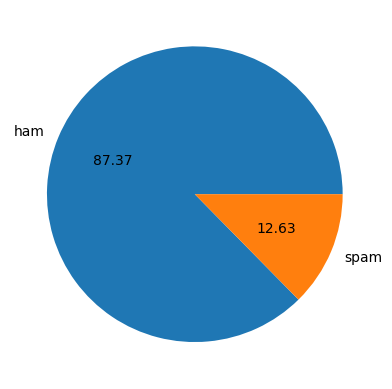

In [279]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [280]:
!pip install nltk

In [281]:
import nltk

In [282]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [283]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [284]:
df["num_characters"] = df['text'].apply(len)

In [285]:
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [286]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [287]:
df['num_sentences']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [288]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [289]:
df[["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [290]:
# ham
df[df['target'] == 0][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [291]:
# spam
df[df['target'] == 1][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [292]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

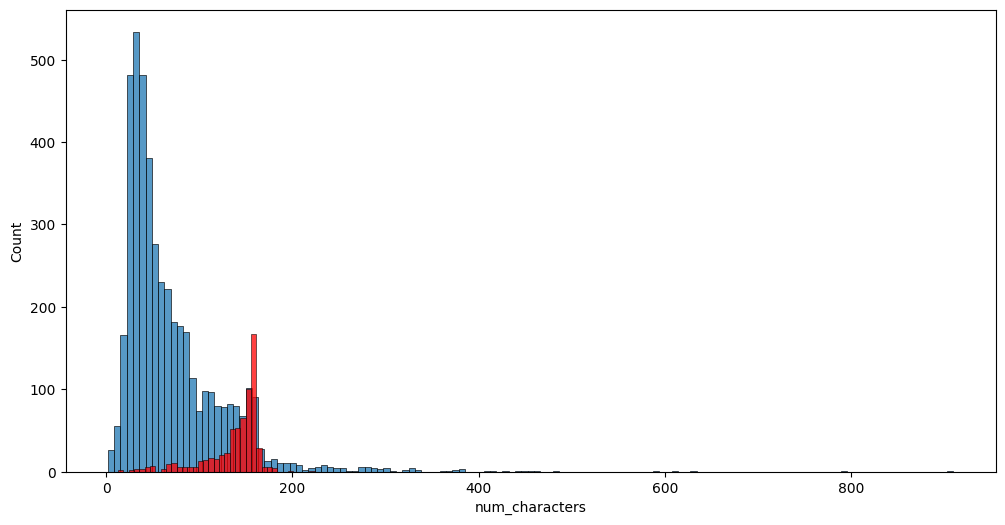

In [293]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

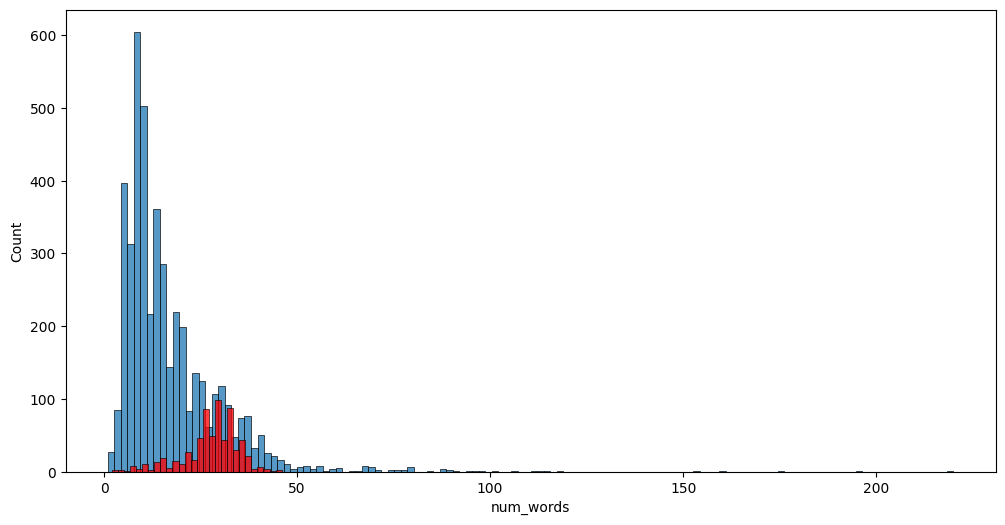

In [294]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

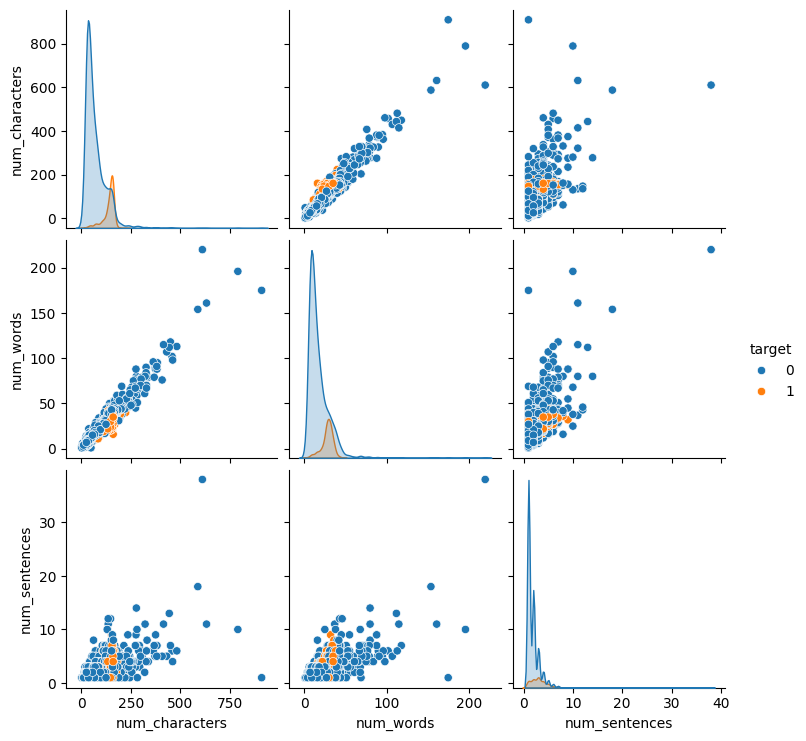

In [295]:
sns.pairplot(df, hue='target')

<Axes: >

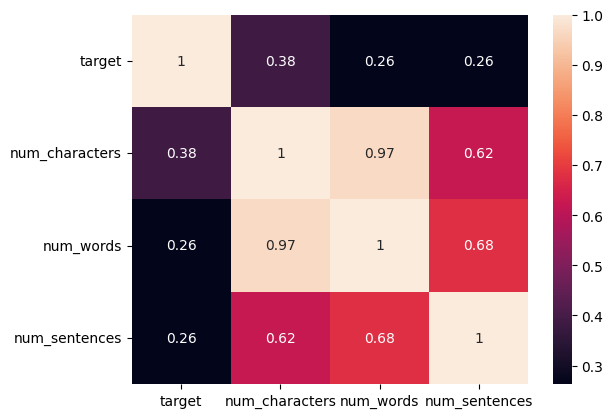

In [296]:
sns.heatmap(df[['target', 'num_characters', 'num_words', 'num_sentences']].corr(), annot=True)

3. **Data Preprocessing**

In [297]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [298]:
!pip install nltk

In [299]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [300]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [301]:
transform_text("Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...")

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [302]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [303]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [304]:
df["text"][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [305]:
df['transform_text'] = df['text'].apply(transform_text)

In [306]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [307]:
!pip install wordcloud

In [308]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [309]:
spam_wc = wc.generate(df[df['target'] == 1]['transform_text'].str.cat(sep=" "))

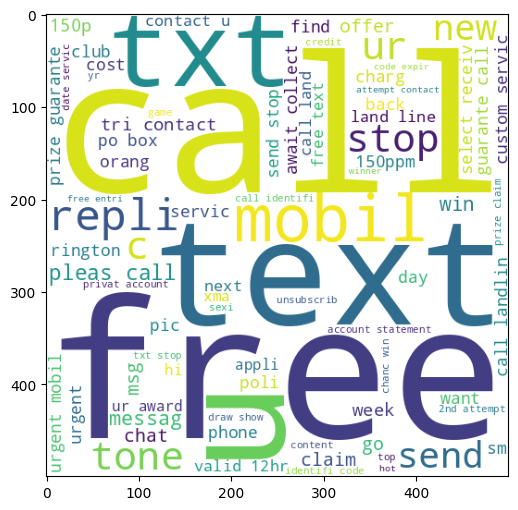

In [310]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [311]:
ham_wc = wc.generate(df[df['target'] == 0]['transform_text'].str.cat(sep=" "))

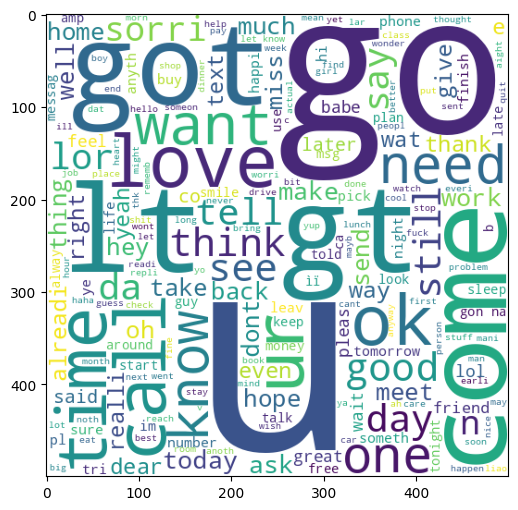

In [312]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [313]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [314]:
spam_corpus = []
for msg in df[df['target'] == 1]['transform_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [315]:
len(spam_corpus)

9939

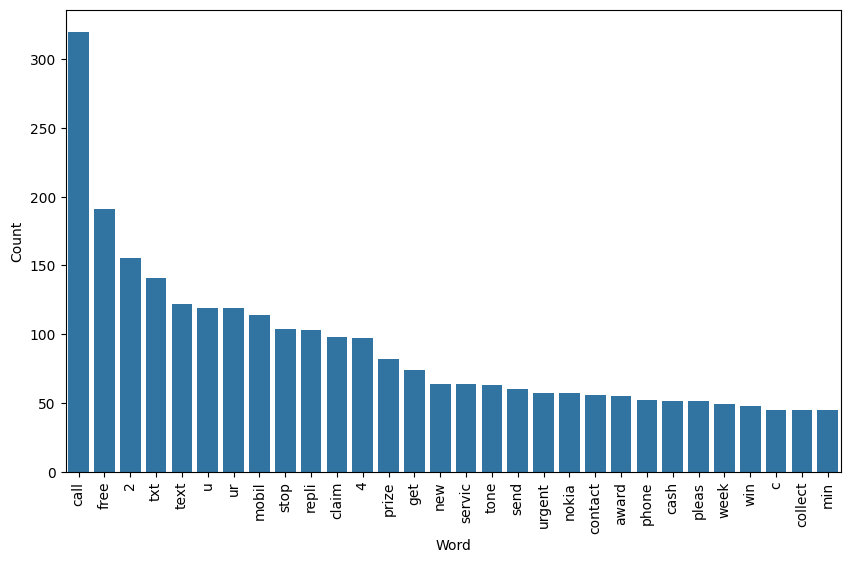

In [316]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

word_freq = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Count'])

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Word', y='Count', data=word_freq)
plt.xticks(rotation=90)
plt.show()

In [317]:
ham_corpus = []
for msg in df[df['target'] == 0]['transform_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [318]:
len(ham_corpus)

35404

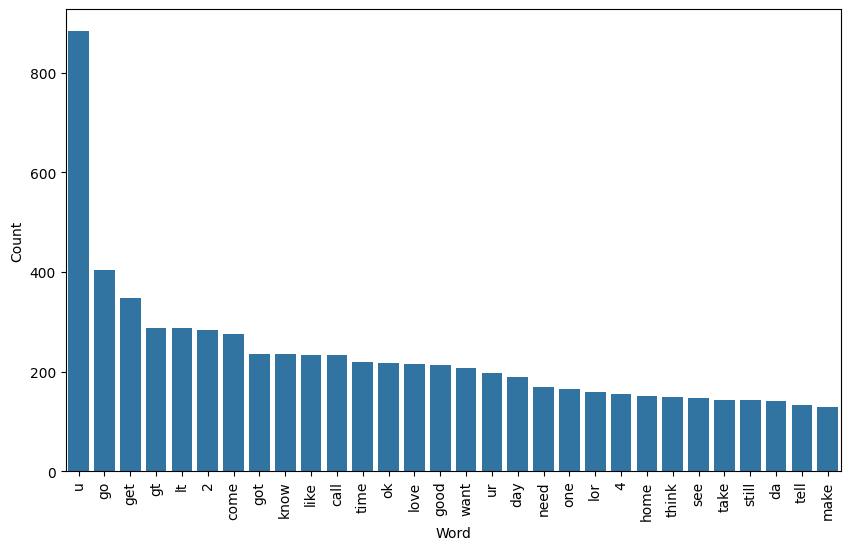

In [319]:
word_freq = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Count'])

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Word', y='Count', data=word_freq)
plt.xticks(rotation=90)
plt.show()

4. **Model building**

In [320]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [321]:
X = tfidf.fit_transform(df['transform_text']).toarray()

In [322]:
# X = cv.fit_transform(df['transform_text']).toarray()

In [323]:
X.shape

(5169, 3000)

In [324]:
y = df['target'].values

In [325]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [326]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [327]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [328]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [329]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [330]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))


0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [331]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [332]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))